In [20]:
# import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Data exploration and visualization

In [3]:
#loading the csv data to a Pandas DataFrame
car_df = pd.read_csv('CarsData.csv')

In [3]:
# Y-data profiling
profile = pp.ProfileReport(car_df, title = "Data Exploration")
profile.to_file("output.html")

Export report to file: 100%|████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 142.72it/s]


In [5]:
# print first ten rows of the dataframe
car_df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [9]:
# print five rows of the dataframe where year<2000
car_df[car_df['year']<2000].head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
785,SLK,1998,1990,Automatic,99300,Petrol,265,32.1,2.3,merc
3475,A3,1998,4999,Automatic,55000,Petrol,265,30.4,1.8,Audi
4410,Land Cruiser,1998,19990,Manual,100000,Diesel,265,23.9,4.2,toyota
15557,A8,1997,4650,Automatic,122000,Petrol,265,18.9,4.2,Audi
20972,SL CLASS,1997,9995,Automatic,76000,Petrol,255,28.2,3.2,merc
22144,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8,BMW
22528,Z3,1999,3995,Manual,74282,Petrol,245,35.3,1.9,BMW
33386,Escort,1996,3000,Manual,50000,Petrol,265,34.4,1.8,ford
35832,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9,BMW
37845,Z3,1999,3995,Manual,51949,Petrol,255,35.3,1.9,BMW


In [11]:
#number of rows and columns in the dataset
car_df.shape

(97712, 10)

In [12]:
#dataset info
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [137]:
car_df.isnull().sum()

index           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

### Handling Zero values

In [4]:
 0 in car_df['tax'].values

True

In [5]:
car_df = car_df[car_df['tax'] !=0].reset_index()

In [6]:
 0 in car_df['tax'].values

False

In [39]:
car_df.describe()

,year,price,mileage,tax,mpg,engineSize
count,91453.000000,91453.000000,91453.000000,91453.000000,91453.000000,91453.000000
mean,2017.162400,17232.002253,22346.730189,128.364898,53.670961,1.684303
std,2.134665,9990.694541,20835.653379,56.862813,13.158730,0.564945
min,1970.000000,450.000000,1.000000,10.000000,0.300000,0.000000
25%,2016.000000,10491.000000,7079.000000,125.000000,45.600000,1.300000
50%,2017.000000,14995.000000,16539.000000,145.000000,54.300000,1.600000
75%,2019.000000,21295.000000,31302.000000,145.000000,60.100000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [40]:
car_df[car_df['price']>20750]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
15,RAV4,2016,20790,Automatic,32196,Hybrid,20,55.4,2.5,toyota
20,Q5,2020,37000,Semi-Auto,1000,Diesel,145,38.2,2.0,Audi
...,...,...,...,...,...,...,...,...,...,...
97648,A3,2017,25990,Semi-Auto,25874,Petrol,150,43.5,2.0,Audi
97673,Tiguan,2019,29490,Manual,5680,Diesel,145,42.8,2.0,volkswagen
97675,2 Series,2020,23990,Semi-Auto,9,Petrol,145,47.9,2.0,BMW
97694,A5,2019,31990,Automatic,1585,Petrol,145,37.2,2.0,Audi


# Data visualization

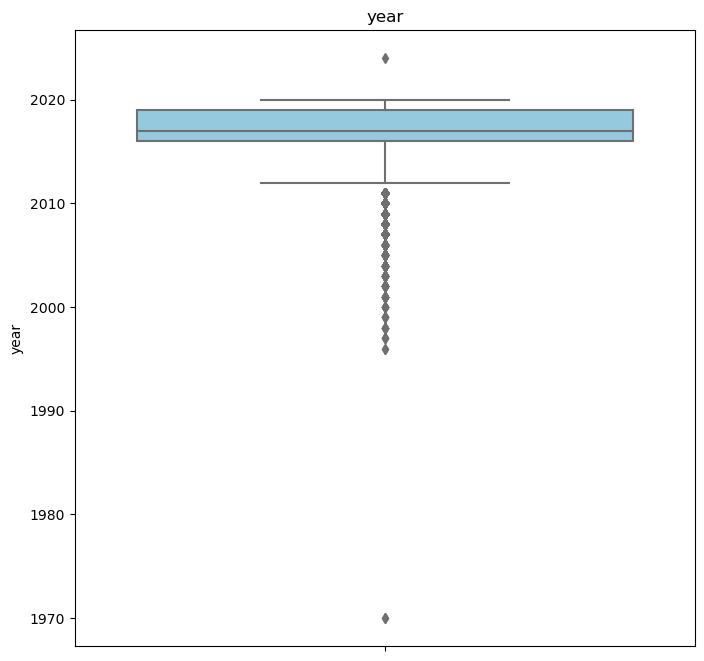

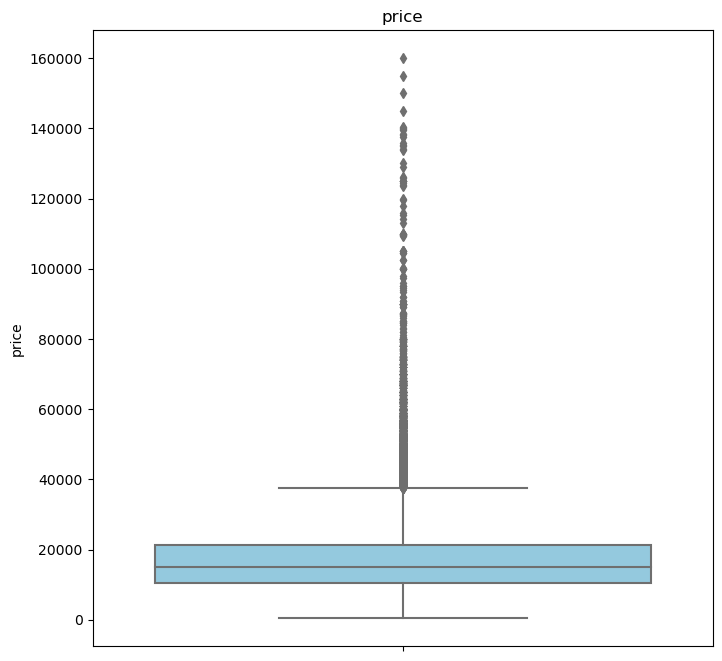

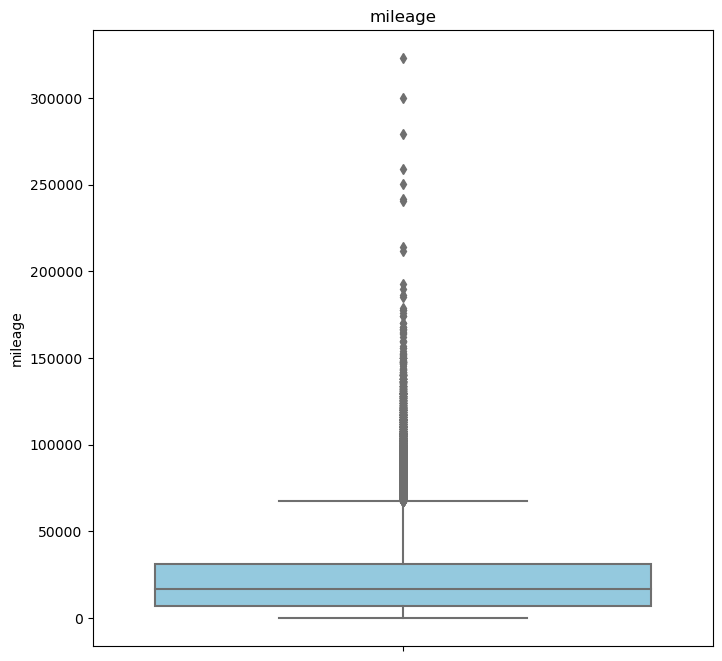

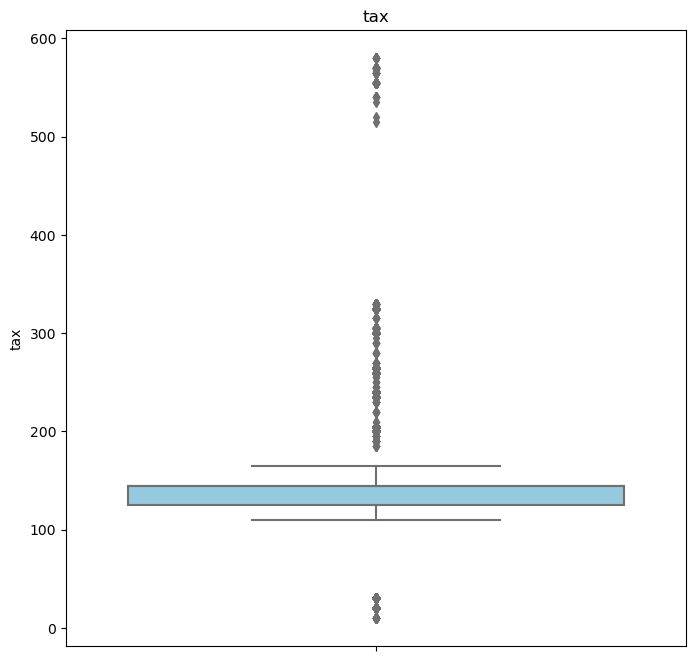

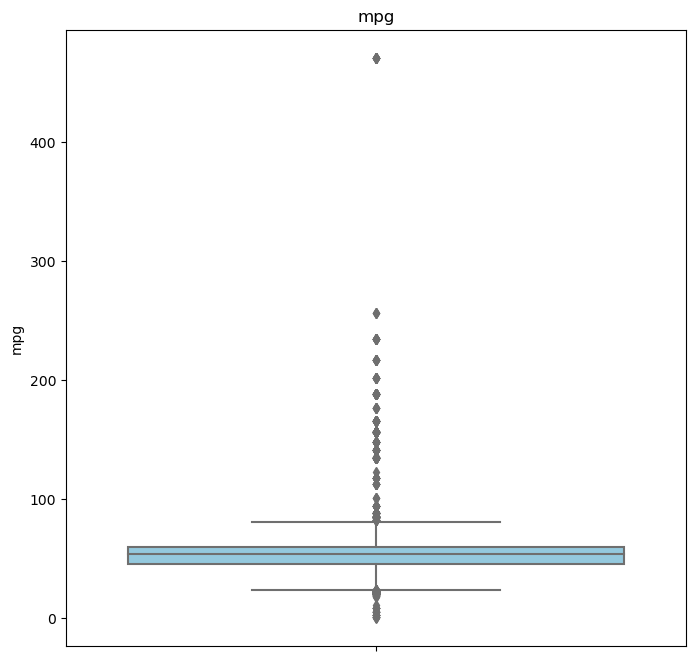

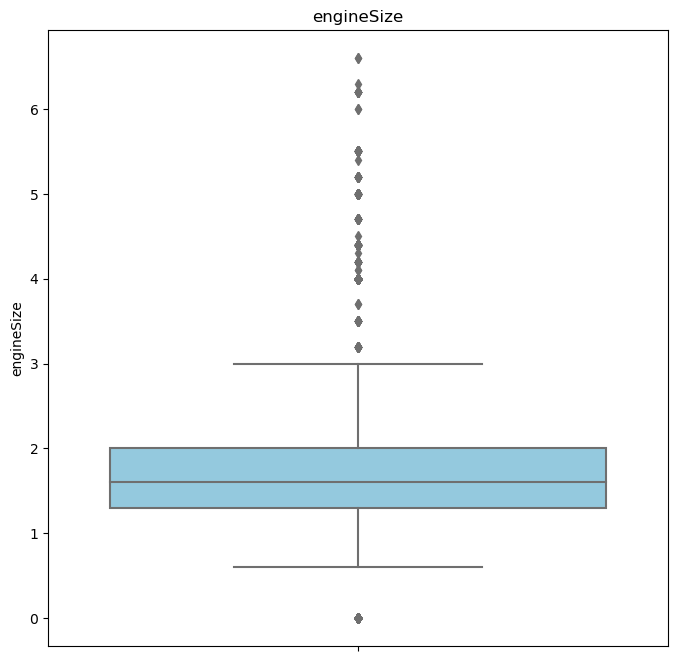

In [97]:
for i in car_df:
    if i == 'model' or i == 'transmission' or i == 'fuelType'or i == 'Manufacturer':
        continue
    else:
        plt.figure(figsize=(8,8))
        sns.boxplot(y=car_df[i], color='skyblue')
        plt.title(i)
        plt.show()
        print("\n")

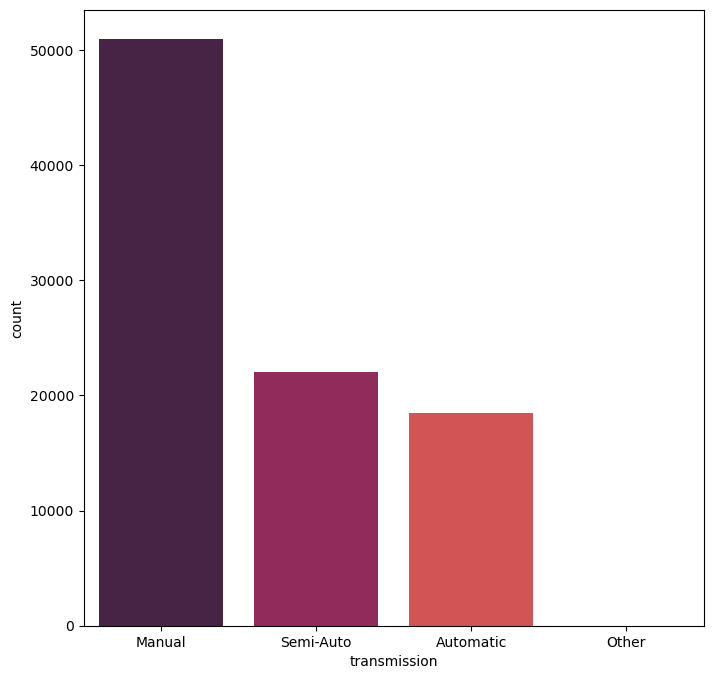

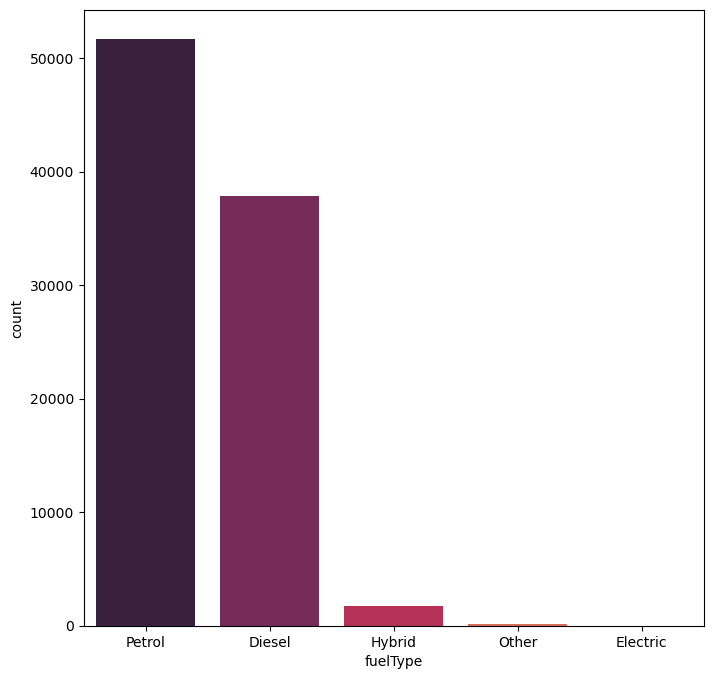

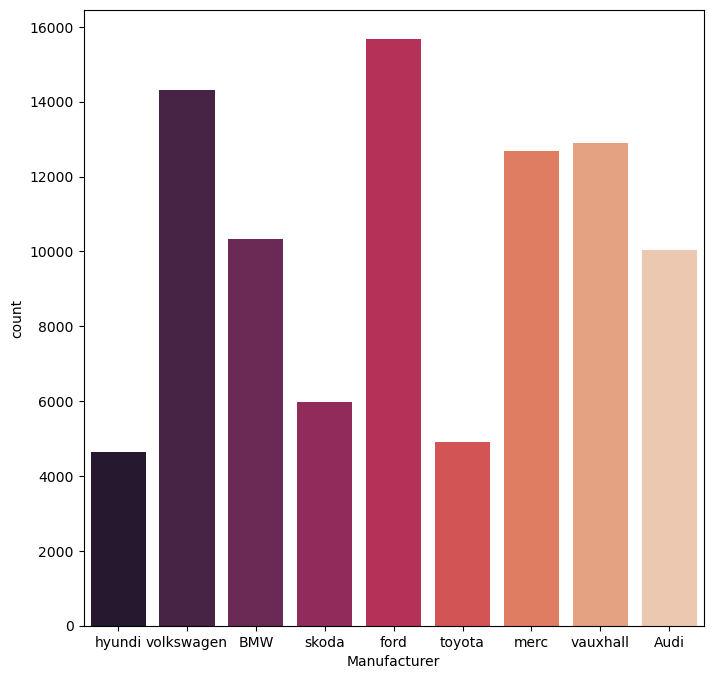

In [102]:
for i in car_df:
    if i == 'transmission' or i == 'fuelType'or i == 'Manufacturer':
        plt.figure(figsize=(8,8))
        sns.countplot(data=car_df, x = i,palette = 'rocket')
        plt.show()
        print("\n")
    else:
        continue

Text(0, 0.5, 'Total Price')

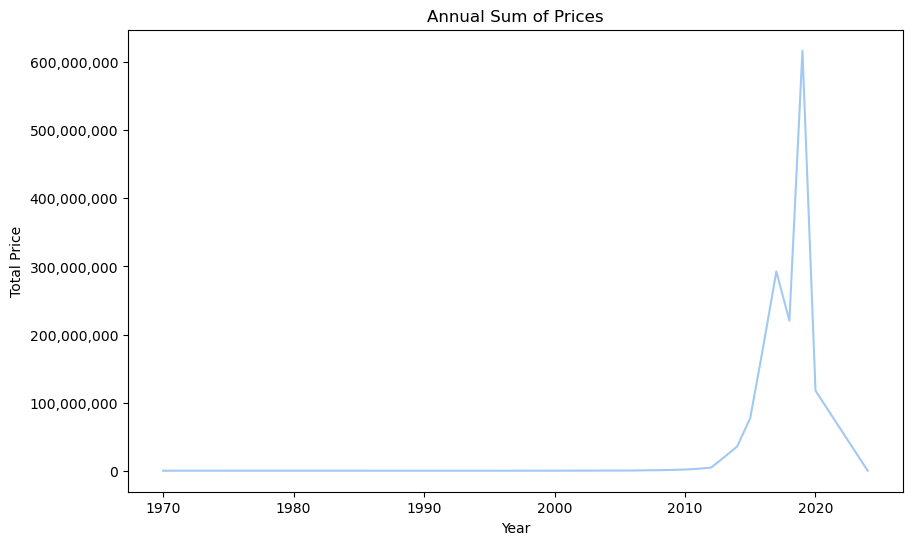

In [114]:
#Car prices over the year
plt.figure(figsize=(10, 6))
ax = car_df.groupby('year')['price'].sum().plot(kind='line', color=sns.color_palette('pastel'))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Annual Sum of Prices')
plt.xlabel('Year')
plt.ylabel('Total Price')

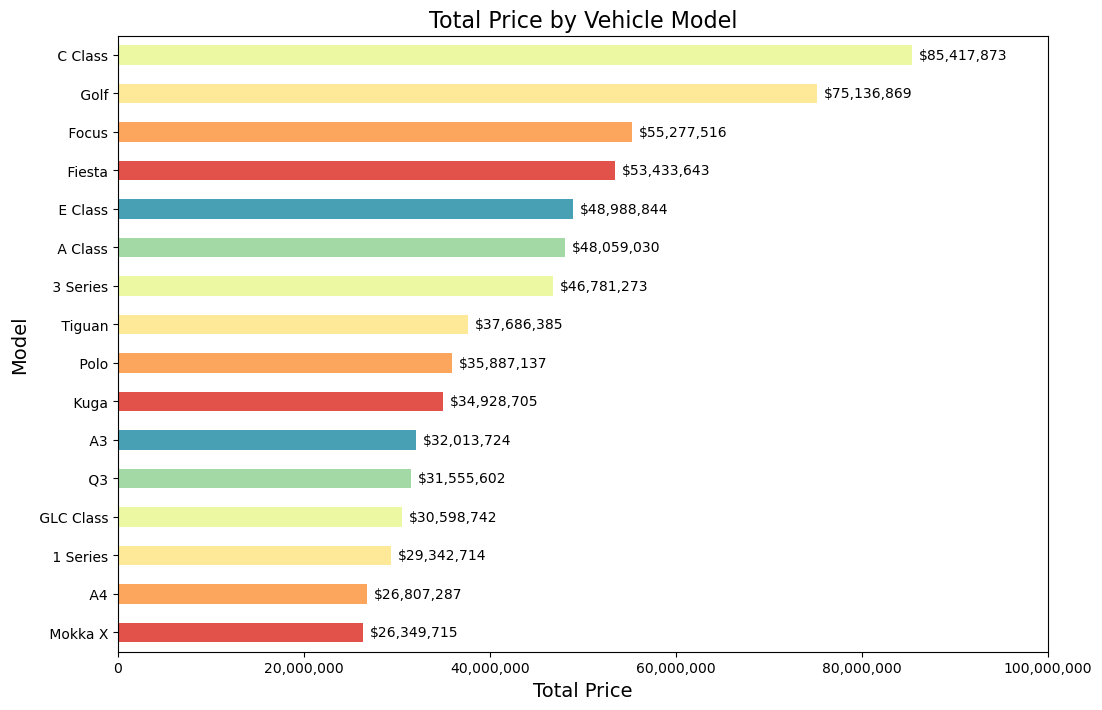

In [104]:
#Total Price by Vehicle Model
plt.figure(figsize=(12, 8))
ax = car_df.groupby("model")['price'].sum().sort_values(ascending=False)[15::-1].plot(
    kind='barh',
    color=sns.color_palette("Spectral")
)

ax.set_title('Total Price by Vehicle Model', fontsize=16)
ax.set_xlabel('Total Price', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

ax.set_xlim(0, 100_000_000)
plt.show()

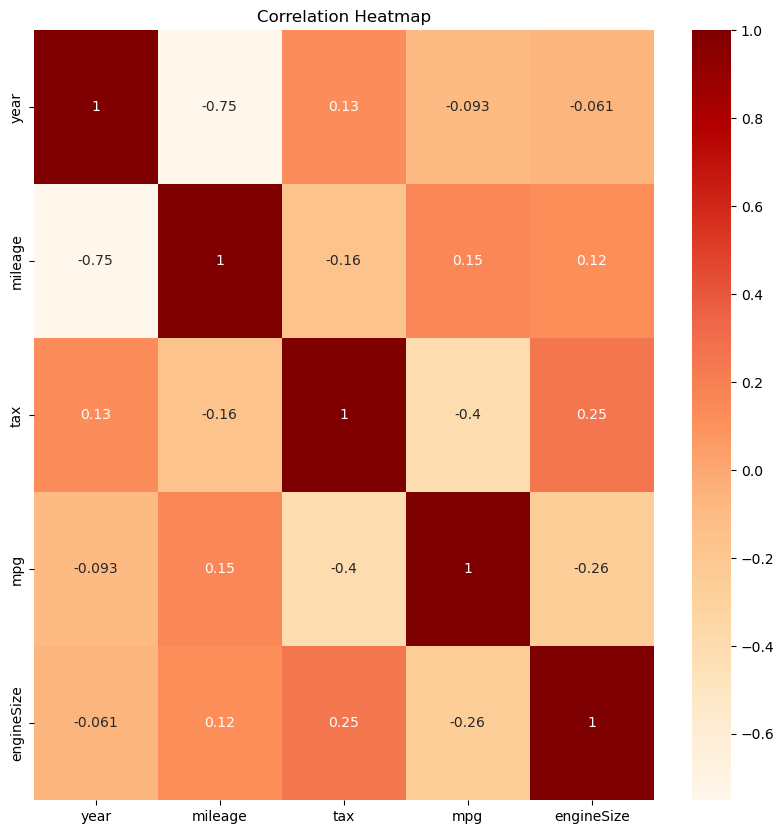

In [110]:
# Correlation Heatmap without price
corr = car_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']].corr()
#corr=car_df.select_dtypes(include='number').columns
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='OrRd')
plt.title('Correlation Heatmap')
plt.show()

# TrainTest

In [7]:
X = car_df.drop(columns = ['price'], axis=1)
Y = car_df['price']

In [7]:
X

,index,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,0,I10,2017,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,1,Polo,2017,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2,2 Series,2019,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,3,Yeti Outdoor,2017,Manual,30960,Diesel,150,62.8,2.0,skoda
4,4,Fiesta,2017,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
91448,97707,Fiesta,2017,Automatic,8337,Petrol,145,54.3,1.0,ford
91449,97708,3 Series,2014,Manual,25372,Diesel,30,61.4,2.0,BMW
91450,97709,Fiesta,2017,Manual,19910,Petrol,125,54.3,1.2,ford
91451,97710,Astra,2017,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [8]:
Y

0         7495
1        10989
2        27990
3        12495
4         7999
         ...  
97707    10447
97708    14995
97709     8950
97710    10700
97711    15798
Name: price, Length: 91453, dtype: int64

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state = 17)

# PreProcessing

In [9]:
ohe = OneHotEncoder()
ohe.fit(X[['model','transmission','fuelType','Manufacturer']])

OneHotEncoder()

In [10]:
ct1 = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                       ['model','transmission','fuelType','Manufacturer']),remainder='passthrough')

In [11]:
ct2 = ColumnTransformer([('scale',MaxAbsScaler(),[0,])],remainder='passthrough')

In [12]:
pipe=make_pipeline(ct1,ct2)

In [13]:
pipe

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara', ' Arteon', ' Astra',
       ' Auris', '...
                                                                            array(['Automatic', 'Manual', 'Other', 'Semi-Auto'], dtype=object),
                                                                            array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                            array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                  ['model', 'transmission',
                                                   'fuelType',
                                                   'Manufacturer'])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MaxAbsScaler(),
                                                  [0])]))])

# Model evalutation

### linear Regression

In [14]:
lr = LinearRegression()

In [15]:
pipe_lr = make_pipeline(pipe,lr)

In [16]:
pipe_lr.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara...
                                                                                             array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                                             array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                                   ['model',
                                                                    'transmission',
                                                                    'fuelType',
                                                                    'Manufacturer'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   MaxAbsScaler(),
                                                                   [0])]))])),
                ('linearregression', LinearRegression())])

In [22]:
Y_pred1_train=pipe_lr.predict(X_train)
Y_pred1_test=pipe_lr.predict(X_test)

In [34]:
print("Scores on Train data [LR]:")

lr_mse_train = mean_squared_error(Y_train, Y_pred1_train, squared=True)
lr_rmse_train = mean_squared_error(Y_train, Y_pred1_train, squared=False)
lr_r2_train = r2_score(Y_train, Y_pred1_train)

print()
print("MSE   : ", lr_mse_train)
print("RMSE  : ", lr_rmse_train)
print("R2    : ", round(lr_r2_train*100,2))


Scores on Train data [LR]:

MSE   :  23173126.491394933
RMSE  :  4813.847368934222
R2    :  77.04


In [35]:
print("Scores on Test data [LR]:")

lr_mse_test = mean_squared_error(Y_test, Y_pred1_test, squared=True)
lr_rmse_test = mean_squared_error(Y_test, Y_pred1_test, squared=False)
lr_r2_test = r2_score(Y_test, Y_pred1_test)

print()
print("MSE   : ", lr_mse_test)
print("RMSE  : ", lr_rmse_test)
print("R2    : ", round(lr_r2_test*100,2))

Scores on Test data [LR]:

MSE   :  20636826.620445255
RMSE  :  4542.777412601817
R2    :  78.37


### Decetion tree

In [36]:
dt = DecisionTreeRegressor()

In [37]:
pipe_dt = make_pipeline(pipe,dt)

In [38]:
pipe_dt.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara...
                                                                                             array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                                             array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                                   ['model',
                                                                    'transmission',
                                                                    'fuelType',
                                                                    'Manufacturer'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   MaxAbsScaler(),
                                                                   [0])]))])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [39]:
Y_pred2_train=pipe_dt.predict(X_train)
Y_pred2_test=pipe_dt.predict(X_test)

In [40]:
print("Scores on Train data [DTR]:")

dtr_mse_train = mean_squared_error(Y_train, Y_pred2_train, squared=True)
dtr_rmse_train = mean_squared_error(Y_train, Y_pred2_train, squared=False)
dtr_r2_train = r2_score(Y_train, Y_pred2_train)

print()
print("MSE   : ", dtr_mse_train)
print("RMSE  : ", dtr_rmse_train)
print("R2    : ", round(dtr_r2_train*100,2))

Scores on Train data [DTR]:

MSE   :  0.0
RMSE  :  0.0
R2    :  100.0


In [41]:
print("Scores on Test data [DTR]:")

dtr_mse_test = mean_squared_error(Y_test, Y_pred2_test, squared=True)
dtr_rmse_test = mean_squared_error(Y_test, Y_pred2_test, squared=False)
dtr_r2_test = r2_score(Y_test, Y_pred2_test)

print()
print("MSE   : ", dtr_mse_test)
print("RMSE  : ", dtr_rmse_test)
print("R2    : ", round(dtr_r2_test*100,2))

Scores on Test data [DTR]:

MSE   :  6077653.629271226
RMSE  :  2465.2897657823564
R2    :  93.63


### RFR

In [45]:
rfr = RandomForestRegressor()

In [46]:
pipe_rfr = make_pipeline(pipe,rfr)

In [47]:
pipe_rfr.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara...
                                                                                             array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                                             array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                                   ['model',
                                                                    'transmission',
                                                                    'fuelType',
                                                                    'Manufacturer'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   MaxAbsScaler(),
                                                                   [0])]))])),
                ('randomforestregressor', RandomForestRegressor())])

In [48]:
Y_pred3_train=pipe_rfr.predict(X_train)
Y_pred3_test=pipe_rfr.predict(X_test)

In [49]:
print("Scores on Train data [RFR]:")

rfr_mse_train = mean_squared_error(Y_train, Y_pred3_train, squared=True)
rfr_rmse_train = mean_squared_error(Y_train, Y_pred3_train, squared=False)
rfr_r2_train = r2_score(Y_train, Y_pred3_train)

print()
print("MSE   : ", rfr_mse_train)
print("RMSE  : ", rfr_rmse_train)
print("R2    : ", round(rfr_r2_train*100,2))

Scores on Train data [RFR]:

MSE   :  572876.8862283876
RMSE  :  756.8863099755389
R2    :  99.43


In [51]:
print("Scores on Test data [RFR]:")

rfr_mse_test = mean_squared_error(Y_test, Y_pred3_test, squared=True)
rfr_rmse_test = mean_squared_error(Y_test, Y_pred3_test, squared=False)
rfr_r2_test = r2_score(Y_test, Y_pred3_test)

print()
print("MSE   : ", rfr_mse_test)
print("RMSE  : ", rfr_rmse_test)
print("R2    : ", round(rfr_r2_test*100,2))

Scores on Test data [RFR]:

MSE   :  3640394.4068396045
RMSE  :  1907.9817627114794
R2    :  96.18


In [72]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':Y_pred3_test,'Difference':Y_test-Y_pred3_test})
pred_df

,Actual Value,Predicted Value,Difference
59241,26499,24493.59,2005.41
1615,10298,10698.63,-400.63
24273,19850,20042.61,-192.61
80518,8999,9818.67,-819.67
867,10752,10860.07,-108.07
...,...,...,...
62220,10995,10311.05,683.95
64390,21714,22230.17,-516.17
75410,8989,9696.94,-707.94
57338,18989,19646.37,-657.37


### GBR

In [52]:
gbr = GradientBoostingRegressor(random_state=0)

In [53]:
pipe_gbr = make_pipeline(pipe,gbr)

In [54]:
pipe_gbr.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara...
                                                                                             array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                                             array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                                   ['model',
                                                                    'transmission',
                                                                    'fuelType',
                                                                    'Manufacturer'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   MaxAbsScaler(),
                                                                   [0])]))])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=0))])

In [55]:
Y_pred4_train=pipe_gbr.predict(X_train)
Y_pred4_test=pipe_gbr.predict(X_test)

In [56]:
print("Scores on Train data [GBR]:")

gbr_mse_train = mean_squared_error(Y_train, Y_pred4_train, squared=True)
gbr_rmse_train = mean_squared_error(Y_train, Y_pred4_train, squared=False)
gbr_r2_train = r2_score(Y_train, Y_pred4_train)

print()
print("MSE   : ", gbr_mse_train)
print("RMSE  : ", gbr_rmse_train)
print("R2    : ", round(gbr_r2_train*100,2))

Scores on Train data [GBR]:

MSE   :  9819205.222018234
RMSE  :  3133.561108709743
R2    :  90.27


In [57]:
print("Scores on Test data [GBR]:")

gbr_mse_test = mean_squared_error(Y_test, Y_pred4_test, squared=True)
gbr_rmse_test = mean_squared_error(Y_test, Y_pred4_test, squared=False)
gbr_r2_test = r2_score(Y_test, Y_pred4_test)

print()
print("MSE   : ", gbr_mse_test)
print("RMSE  : ", gbr_rmse_test)
print("R2    : ", round(gbr_r2_test*100,2))

Scores on Test data [GBR]:

MSE   :  9290578.467815883
RMSE  :  3048.0450239154743
R2    :  90.26


### Lasso Regression

In [67]:
from sklearn import linear_model
lassoR = linear_model.Lasso(alpha=0.1, tol=1e-2)

In [61]:
pipe_lassoR = make_pipeline(pipe,lassoR)

In [62]:
pipe_lassoR.fit(X_train,Y_train)

C:\Users\Asus\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 388831981318.22437, tolerance: 73829812428.1255
  model = cd_fast.sparse_enet_coordinate_descent(


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer-1',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('onehotencoder',
                                                                   OneHotEncoder(categories=[array([' 1 Series', ' 2 Series', ' 3 Series', ' 4 Series', ' 5 Series',
       ' 6 Series', ' 7 Series', ' 8 Series', ' A Class', ' A1', ' A2',
       ' A3', ' A4', ' A5', ' A6', ' A7', ' A8', ' Accent', ' Adam',
       ' Agila', ' Amarok', ' Amica', ' Antara...
                                                                                             array(['Diesel', 'Electric', 'Hybrid', 'Other', 'Petrol'], dtype=object),
                                                                                             array(['Audi', 'BMW', 'ford', 'hyundi', 'merc', 'skoda', 'toyota',
       'vauxhall', 'volkswagen'], dtype=object)]),
                                                                   ['model',
                                                                    'transmission',
                                                                    'fuelType',
                                                                    'Manufacturer'])])),
                                 ('columntransformer-2',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('scale',
                                                                   MaxAbsScaler(),
                                                                   [0])]))])),
                ('lasso', Lasso(alpha=0.1, tol=0.01))])

In [63]:
Y_pred5_train=pipe_lassoR.predict(X_train)
Y_pred5_test=pipe_lassoR.predict(X_test)

In [64]:
print("Scores on Train data [Lasso]:")

lassoR_mse_train = mean_squared_error(Y_train, Y_pred5_train, squared=True)
lassoR_rmse_train = mean_squared_error(Y_train, Y_pred5_train, squared=False)
lassoR_r2_train = r2_score(Y_train, Y_pred5_train)

print()
print("MSE   : ", lassoR_mse_train)
print("RMSE  : ", lassoR_rmse_train)
print("R2    : ", round(lassoR_r2_train*100,2))

Scores on Train data [Lasso]:

MSE   :  14558424.900540588
RMSE  :  3815.550405975603
R2    :  85.57


In [65]:
print("Scores on Test data [GBR]:")

lassoR_mse_test = mean_squared_error(Y_test, Y_pred5_test, squared=True)
lassoR_rmse_test = mean_squared_error(Y_test, Y_pred5_test, squared=False)
lassoR_r2_test = r2_score(Y_test, Y_pred5_test)

print()
print("MSE   : ", lassoR_mse_test)
print("RMSE  : ", lassoR_rmse_test)
print("R2    : ", round(lassoR_r2_test*100,2))

Scores on Test data [GBR]:

MSE   :  12609764.297143376
RMSE  :  3551.022993046282
R2    :  86.78


## R2 score comparison

In [68]:
s1 = lr_r2_test
s2 = dtr_r2_test
s3 = rfr_r2_test
s4 = gbr_r2_test
s5 = lassoR_r2_test

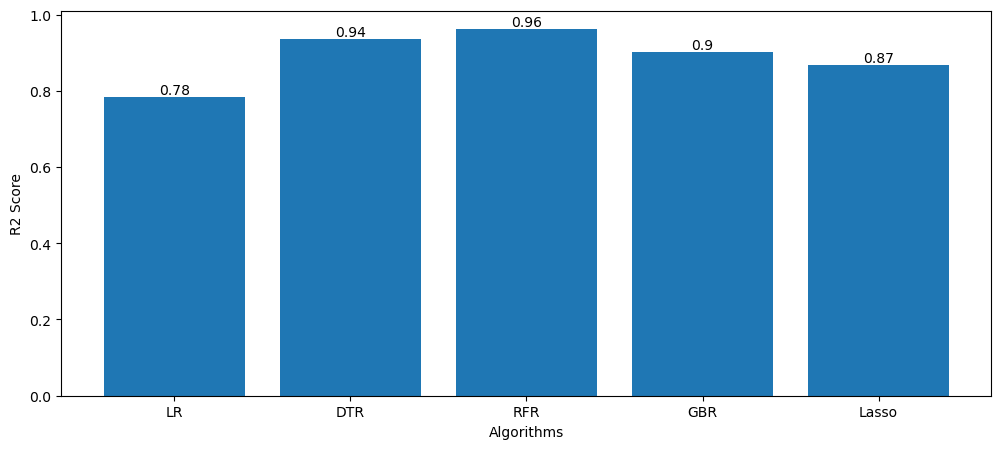

In [71]:
accuracy_scores = [s1, s2, s3, s4, s5]
algorithms = ['LR', 'DTR', 'RFR', 'GBR', 'Lasso']

plt.rcParams['figure.figsize'] = (12, 5)
bars = plt.bar(algorithms, accuracy_scores)

# Add text labels on top of each bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(score, 2),
             ha='center', va='bottom')

plt.xlabel("Algorithms")
plt.ylabel("R2 Score")
plt.show()
